<div align="left">
<img align="left" src="../../rec/front_page_fer.png" >
<div> <b>FER</b></div>
<div> Facial Expression Recognition</div>
<div> Pedro D. Marrero Fernandez</div>
<div> :), :(, :/</div>
</div>

In [2]:
import os
import sys
import torch
import pandas as pd
import numpy as np

sys.path.append('../')
from torchlib.neuralnet import  NeuralNet
from torchlib.datasets  import  imageutl as imutl

import matplotlib.pyplot as plt
plt.ion()   # interactive mode


sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)


In [2]:
# path
base_folder = '../db/fer2013/data/'
    
# List of folders for training, validation and test.
train_folders = ['FER2013Train']
valid_folders = ['FER2013Valid'] 
test_folders  = ['FER2013Test']

emotion_name = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear', 'contempt']


print(base_folder)
print(emotion_name)


../db/fer2013/data/
['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear', 'contempt']


0 255


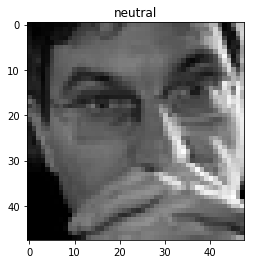

In [5]:

data = imutl.ferProvide.create(base_folder, train_folders, "label.csv", emotion_count=8)
image, label = data[ np.random.randint( len(data)) ]
label = np.argmax(label)

print( np.min(image), np.max(image) )
plt.imshow(image, cmap='gray')
plt.title( emotion_name[label] )
plt.show()

=> loading checkpoint './netruns/exp_net_simplenet_lr0001pl_daum_proc_001/model_best.pth.tar'
=> loaded checkpoint for simplenet arch!
[[  2.93895137e-03   9.87118006e-01   8.54542945e-04   4.70667426e-03
    3.78664862e-03   2.28761171e-04   2.09264414e-04   1.57158385e-04]]


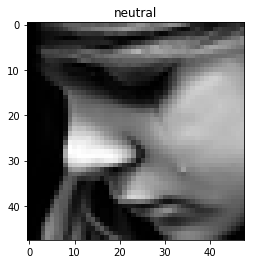

In [37]:

project='./netruns'
name='nettest'
pathmodel='./netruns/exp_net_simplenet_lr0001pl_daum_proc_001/model_best.pth.tar'
no_cuda=True
gpu=0

# create net
network = nnet.SingleNet(
        patchproject=project,
        nameproject=name,
        no_cuda=no_cuda,
        gpu=gpu
        )

# load model
network.load( pathmodel )

# predict 
y = network.inference(image)[0]
labelhat = np.argmax(y)

print(y)
plt.imshow(image, cmap='gray')
plt.title( emotion_name[labelhat] )
plt.show()


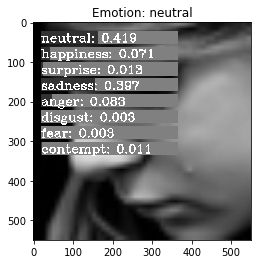

original label: 3
estimate label: 0
estimate prob: ['neutral:41.941%', 'happiness:7.077%', 'surprise:1.289%', 'sadness:39.692%', 'anger:8.350%', 'disgust:0.308%', 'fear:0.259%', 'contempt:1.083%']


In [38]:

import cv2
import scipy.misc

def drawlabel(image, y, emotions, imsize=(550,550)):
    
    colors = ([128,128,128],[128,128,128],[255,255,255],[0,255,0]);
    hbox=32; wbox=135 + 210;
    image_sh = image.copy() 
    image_sh = cv2.cvtColor(image_sh, cv2.COLOR_GRAY2BGR)
    image_sh = scipy.misc.imresize(image_sh, imsize, interp='bilinear')
    ymax = np.argmax(y)
    
    for i,yi in enumerate(y):

        k = 1 if y[i]>0.5 else 0
        kh = 1 if ymax==i else 0
    
        bbox = np.array([[0,0],[wbox,0],[wbox,hbox],[0,hbox]]);    
        bbox[:,0] += 19
        bbox[:,1] += 50-28 + (i)*40
        im = cv2.fillConvexPoly(image_sh, bbox, color=colors[kh] )
        
        bbox = np.array([[0,0],[int(wbox*y[i]),0],[int(y[i]*wbox),hbox],[0,hbox]]);    
        bbox[:,0] += 19
        bbox[:,1] += 50-28 + (i)*40
        im = cv2.fillConvexPoly(image_sh, bbox, color=[50,50,50] )
        
        cv2.putText(
                image_sh, 
                '{}: {:.3f}'.format(emotion_name[i],y[i]), 
                (20, 50 + (i)*40), 
                color=colors[2+k], 
                fontFace=cv2.FONT_HERSHEY_COMPLEX, 
                fontScale=1, 
                thickness=2
                )
    return image_sh


imgsh = drawlabel(image, y, emotion_name)

plt.imshow(imgsh);
plt.title('Emotion: {}'.format(emotion_name[labelhat]))
plt.show();

print('original label: {}'.format( label ) )
print('estimate label: {}'.format( labelhat ) )
print('estimate prob: {}'.format( [ '{}:{:.3f}%'.format(emotion_name[i],yi*100) for i,yi in enumerate(y) ]  ) )     

# Microsoft Examples


face001 : {'scores': {'contempt': 9.41454637e-05, 'neutral': 0.000325483561, 'fear': 0.000138658725, 'sadness': 0.0009255572, 'disgust': 0.000136653078, 'surprise': 0.0002797262, 'anger': 0.000238974259, 'happiness': 0.9978608}, 'faceRectangle': {'top': 236, 'height': 275, 'left': 463, 'width': 275}}


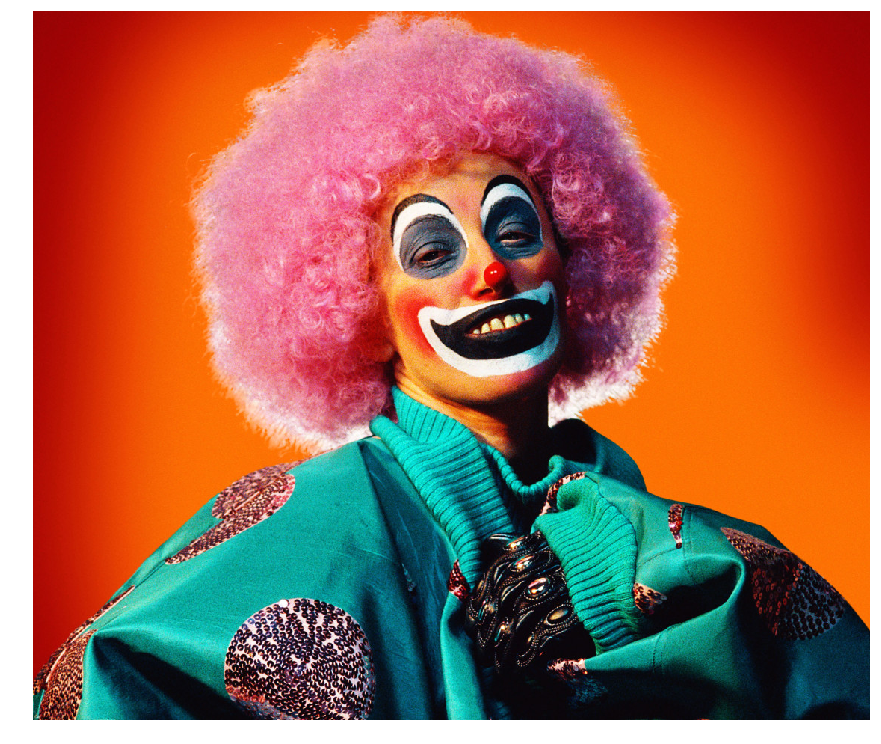

In [8]:
import json
import cv2
import os

def loadconfig(pathname):
    ''' configurate '''
    with open(pathname, "r" ) as f: 
        data = json.load(f)
    for d,v in data.items():
        print('{} : {}'.format(d, v))
    return data

pathname = '../db/mias'
postfname=3
pathnamelabel = os.path.join(pathname, 'label{:03d}.json'.format(postfname))
pathnameimage = os.path.join(pathname, 'img{:03d}.jpeg'.format(postfname))

labels = loadconfig(pathnamelabel)
image = cv2.imread(pathnameimage)[:,:,(2,1,0)]


plt.figure( figsize=(15,20) )
plt.imshow(image)
plt.axis('off')
plt.ioff()
plt.show()


face001 {'scores': {'contempt': 9.41454637e-05, 'neutral': 0.000325483561, 'fear': 0.000138658725, 'sadness': 0.0009255572, 'disgust': 0.000136653078, 'surprise': 0.0002797262, 'anger': 0.000238974259, 'happiness': 0.9978608}, 'faceRectangle': {'top': 236, 'height': 275, 'left': 463, 'width': 275}}


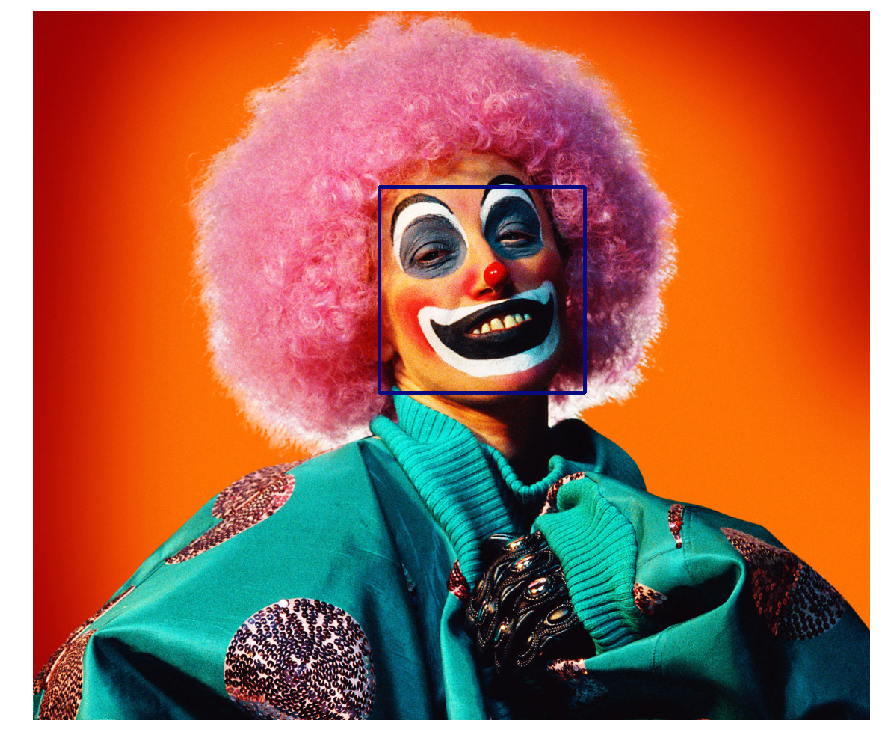

In [9]:
def dictbox2arraybox(box):
    bbox = np.array([box['top'],box['left'],box['top']+box['width'],box['left']+box['height']])
    return bbox

def drawface(image, bbox):    
    cv2.rectangle(image, (bbox[1], bbox[0]), (bbox[3],bbox[2]), color=[10,10,128], thickness=3)
    return image



#image_sh = image.copy()
#box = labels['face001']['faceRectangle']
#image_sh = drawface(image_sh,bbox)

image_sh = image.copy()
for k,vface in labels.items():
    print(k,vface)
    box = vface['faceRectangle']
    bbox = dictbox2arraybox(box)
    image_sh = drawface(image_sh,bbox)


plt.figure( figsize=(15,20) )
plt.imshow(image_sh)
plt.axis('off')
plt.ioff()
plt.show()


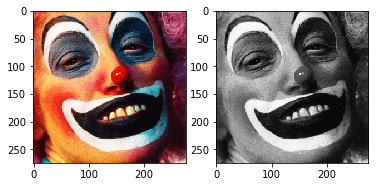

[236 463 511 738]
contempt 0.0094
neutral 0.0325
fear 0.0139
sadness 0.0926
disgust 0.0137
surprise 0.0280
anger 0.0239
happiness 99.7861


In [10]:

iface=1
box = labels['face{:03d}'.format(iface)]['faceRectangle']
score = labels['face{:03d}'.format(iface)]['scores'] 
bbox = np.array([box['top'],box['left'],box['top']+box['width'],box['left']+box['height']])

imageface = image[bbox[0]:bbox[2],bbox[1]:bbox[3]]
imagefacegray = np.mean(imageface,axis=2) 


plt.figure()
plt.subplot(121)
plt.imshow(imageface)
plt.subplot(122)
plt.imshow(imagefacegray, cmap='gray')
plt.show()

print(bbox)
#print(label)
for k,v in score.items():
    print(k, '{:.4f}'.format(v*100) )


=> loading checkpoint './netruns/exp_net_inceptionv3_lr0001pl_daum_proc_001/model_best.pth.tar'
=> loaded checkpoint for inceptionv3 arch!


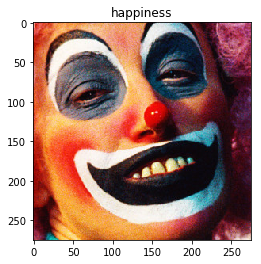

sadness 0.0000
neutral 0.0000
fear 0.0000
contempt 0.0000
disgust 0.0000
surprise 0.0000
anger 0.0010
happiness 99.9990


In [11]:

#exp_net_inceptionv3_lr0001pl_daum_proc_001
#exp_net_simplenet_lr0001pl_daum_proc_001

project='./netruns'
name='nettest'
pathmodel='./netruns/exp_net_inceptionv3_lr0001pl_daum_proc_001/model_best.pth.tar'
no_cuda=True
gpu=0

# create net
network = nnet.SingleNet(
        patchproject=project,
        nameproject=name,
        no_cuda=no_cuda,
        gpu=gpu
        )

# load model
network.load( pathmodel )

# predict 
y = network.inference(imagefacegray)[0]
score = dict(zip(emotion_name, y))
labelhat = np.argmax(y)

plt.imshow(imageface, cmap='gray')
plt.title( emotion_name[labelhat] )
plt.show()

#print('estimate prob: {}'.format( [ '{}:{:.3f}%'.format(emotion_name[i],yi*100) for i,yi in enumerate(y) ]  ) ) 
for k,v in score.items():
    print(k, '{:.4f}'.format(v*100) )

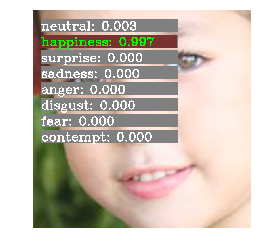

sadness 0.0041
contempt 0.0000
disgust 0.0000
happiness 99.6908
fear 0.0000
neutral 0.3051
surprise 0.0000
anger 0.0000


In [83]:
import cv2
import scipy.misc

def drawlabel(image, y, emotions, imsize=(550,550)):
    
    colors = ([128,128,128],[128,128,128],[255,255,255],[0,255,0]);
    hbox=32; wbox=135 + 210;
    image_sh = image.copy() 
    #image_sh = cv2.cvtColor(image_sh, cv2.COLOR_GRAY2BGR)
    image_sh = scipy.misc.imresize(image_sh, imsize, interp='bilinear')
    ymax = np.argmax(y)
    
    for i,yi in enumerate(y):

        k = 1 if y[i]>0.5 else 0
        kh = 1 if ymax==i else 0
    
        bbox = np.array([[0,0],[wbox,0],[wbox,hbox],[0,hbox]]);    
        bbox[:,0] += 19
        bbox[:,1] += 50-28 + (i)*40
        im = cv2.fillConvexPoly(image_sh, bbox, color=colors[kh] )
        
        bbox = np.array([[0,0],[int(wbox*y[i]),0],[int(y[i]*wbox),hbox],[0,hbox]]);    
        bbox[:,0] += 19
        bbox[:,1] += 50-28 + (i)*40
        im = cv2.fillConvexPoly(image_sh, bbox, color=[120,50,50] )
        
        cv2.putText(
                image_sh, 
                '{}: {:.3f}'.format(emotion_name[i],y[i]), 
                (20, 50 + (i)*40), 
                color=colors[2+k], 
                fontFace=cv2.FONT_HERSHEY_COMPLEX, 
                fontScale=1, 
                thickness=2
                )
    return image_sh



imgsh = drawlabel( np.uint8(imageface) , y, emotion_name)

plt.imshow(imgsh);
#plt.title('Emotion: {}'.format(emotion_name[labelhat]))
plt.axis('off')
plt.ioff()
plt.show();

for k,v in score.items():
    print(k, '{:.4f}'.format(v*100) )

#print('original label: {}'.format( label ) )
#print('estimate label: {}'.format( labelhat ) )
#print('estimate prob: {}'.format( [ '{}:{:.3f}%'.format(emotion_name[i],yi*100) for i,yi in enumerate(y) ]  ) )   

face001 {'faceRectangle': {'height': 275, 'width': 275, 'left': 463, 'top': 236}, 'scores': {'anger': 0.000238974259, 'sadness': 0.0009255572, 'happiness': 0.9978608, 'disgust': 0.000136653078, 'contempt': 9.41454637e-05, 'surprise': 0.0002797262, 'neutral': 0.000325483561, 'fear': 0.000138658725}}


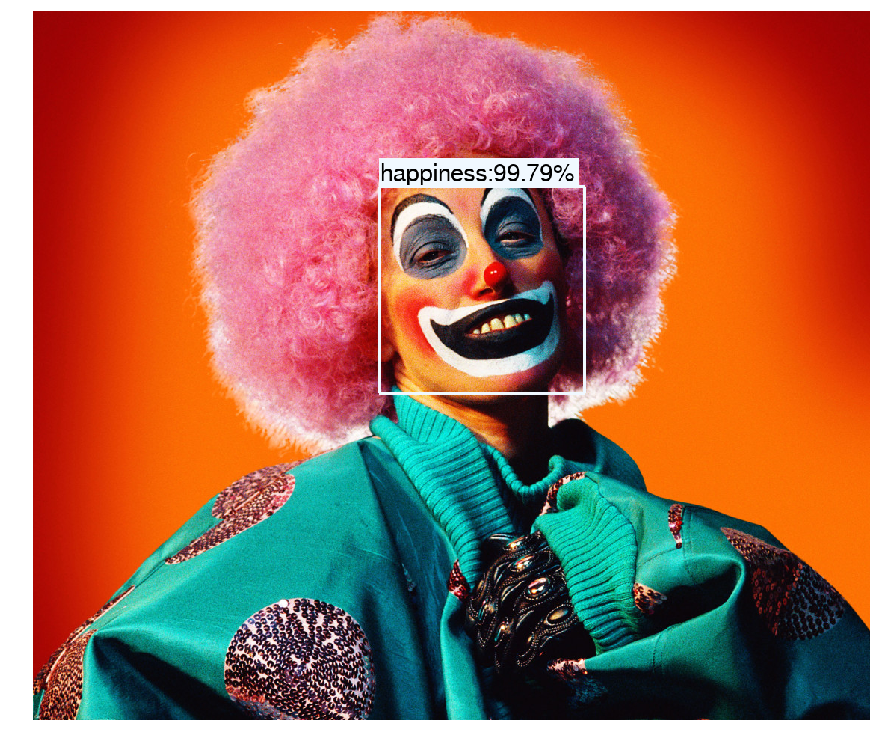

In [11]:

import PIL.Image as Image
import PIL.ImageColor as ImageColor
import PIL.ImageDraw as ImageDraw
import PIL.ImageFont as ImageFont
import operator

STANDARD_COLORS = [
    'AliceBlue', 'Chartreuse', 'Aqua', 'Aquamarine', 'Azure', 'Beige', 'Bisque',
    'BlanchedAlmond', 'BlueViolet', 'BurlyWood', 'CadetBlue', 'AntiqueWhite',
    'Chocolate', 'Coral', 'CornflowerBlue', 'Cornsilk', 'Crimson', 'Cyan',
    'DarkCyan', 'DarkGoldenRod', 'DarkGrey', 'DarkKhaki', 'DarkOrange',
    'DarkOrchid', 'DarkSalmon', 'DarkSeaGreen', 'DarkTurquoise', 'DarkViolet',
    'DeepPink', 'DeepSkyBlue', 'DodgerBlue', 'FireBrick', 'FloralWhite',
    'ForestGreen', 'Fuchsia', 'Gainsboro', 'GhostWhite', 'Gold', 'GoldenRod',
    'Salmon', 'Tan', 'HoneyDew', 'HotPink', 'IndianRed', 'Ivory', 'Khaki',
    'Lavender', 'LavenderBlush', 'LawnGreen', 'LemonChiffon', 'LightBlue',
    'LightCoral', 'LightCyan', 'LightGoldenRodYellow', 'LightGray', 'LightGrey',
    'LightGreen', 'LightPink', 'LightSalmon', 'LightSeaGreen', 'LightSkyBlue',
    'LightSlateGray', 'LightSlateGrey', 'LightSteelBlue', 'LightYellow', 'Lime',
    'LimeGreen', 'Linen', 'Magenta', 'MediumAquaMarine', 'MediumOrchid',
    'MediumPurple', 'MediumSeaGreen', 'MediumSlateBlue', 'MediumSpringGreen',
    'MediumTurquoise', 'MediumVioletRed', 'MintCream', 'MistyRose', 'Moccasin',
    'NavajoWhite', 'OldLace', 'Olive', 'OliveDrab', 'Orange', 'OrangeRed',
    'Orchid', 'PaleGoldenRod', 'PaleGreen', 'PaleTurquoise', 'PaleVioletRed',
    'PapayaWhip', 'PeachPuff', 'Peru', 'Pink', 'Plum', 'PowderBlue', 'Purple',
    'Red', 'RosyBrown', 'RoyalBlue', 'SaddleBrown', 'Green', 'SandyBrown',
    'SeaGreen', 'SeaShell', 'Sienna', 'Silver', 'SkyBlue', 'SlateBlue',
    'SlateGray', 'SlateGrey', 'Snow', 'SpringGreen', 'SteelBlue', 'GreenYellow',
    'Teal', 'Thistle', 'Tomato', 'Turquoise', 'Violet', 'Wheat', 'White',
    'WhiteSmoke', 'Yellow', 'YellowGreen'
]

def dictbox2arraybox(box):
    bbox = np.array([box['top'],box['left'],box['top']+box['width'],box['left']+box['height']])
    return bbox


def draw_bounding_box(image, bbox, label, color='red', thickness=4):
    
    image_pil = Image.fromarray(np.uint8(image)).convert('RGB') 
    im_width, im_height = image_pil.size

    draw = ImageDraw.Draw(image_pil)
    #xmin = bbox[0,0]; ymin = bbox[0,1];
    #xmax = bbox[1,0]; ymax = bbox[1,1];
    #(left, right, top, bottom) = (xmin, xmax, ymin, ymax)
    (top, left, bottom, right) = bbox

    draw.line([(left, top), (left, bottom), (right, bottom),
             (right, top), (left, top)], width=thickness, fill=color)
    
    try:
        font = ImageFont.truetype('/usr/share/fonts/freefont/FreeSans.ttf', 32, encoding="unic") #'arial.ttf'
        #font = ImageFont.truetype('arial.ttf', 32) 
    except IOError:
        font = ImageFont.load_default()
    
    text_bottom = top
    
    # Reverse list and print from bottom to top.
    #for display_str in display_str_list[::-1]:
    
    emtname=label[0]
    emtscore=label[1]
    display_str = '{}:{:.2f}% '.format( emtname, emtscore*100 );
    
    text_width, text_height = font.getsize( display_str )
    margin = np.ceil(0.05 * text_height)
    draw.rectangle(
        [(left, text_bottom - text_height - 2 * margin), 
        (left + text_width, text_bottom)],
        fill=color)
    
    draw.text(
        (left + margin, text_bottom - text_height - margin),
        display_str,
        fill='black',
        font=font)
    text_bottom -= text_height - 2 * margin
    
    
    
    np.copyto(image, np.array(image_pil))


image_sh = image.copy()
for i,(k,vface) in enumerate(labels.items()):
    print(k,vface)    
    score = vface['scores']
    curremot = max(score.items(), key=operator.itemgetter(1))    
    box = vface['faceRectangle']
    bbox = dictbox2arraybox(box)
       
    draw_bounding_box(image_sh, bbox, curremot, color=STANDARD_COLORS[i])


plt.figure( figsize=(15,20) )
plt.imshow(image_sh)
plt.axis('off')
plt.ioff()
plt.show()



In [8]:
# load net model
#exp_net_inceptionv3_lr0001pl_daum_proc_001
#exp_net_simplenet_lr0001pl_daum_proc_001

project='./netruns'
name='nettest'
pathmodel='./netruns/exp_net_inceptionv3_lr0001pl_daum_proc_001/model_best.pth.tar'
no_cuda=True
gpu=0

# create net
network = nnet.SingleNet(
        patchproject=project,
        nameproject=name,
        no_cuda=no_cuda,
        gpu=gpu
        )

# load model
network.load( pathmodel )



=> loading checkpoint './netruns/exp_net_inceptionv3_lr0001pl_daum_proc_001/model_best.pth.tar'
=> loaded checkpoint for inceptionv3 arch!


True

face001 {'sadness': 4.1451021e-05, 'surprise': 9.636298e-09, 'happiness': 0.99690783, 'fear': 4.4674184e-09, 'anger': 2.7190657e-08, 'contempt': 6.9888848e-08, 'neutral': 0.0030505797, 'disgust': 4.7035282e-09}


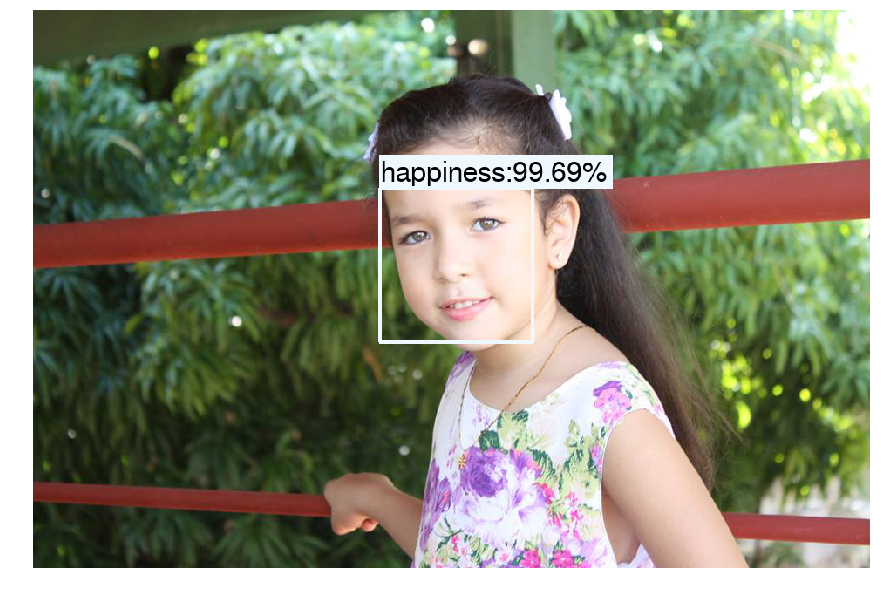

In [32]:
emotion_name = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear', 'contempt']
image_sh = image.copy()
for i,(k,vface) in enumerate(labels.items()):
    
    #print(k,vface)    
    #score = vface['scores']
    #curremot = max(score.items(), key=operator.itemgetter(1))    
    box = vface['faceRectangle']
    bbox = dictbox2arraybox(box)
       
    # select crop
    imageface = image[bbox[0]:bbox[2],bbox[1]:bbox[3]]
    imagefacegray = np.mean(imageface,axis=2) 
    
    # predict
    y = network.inference(imagefacegray)[0]
    score = dict(zip(emotion_name, y))
    curremot = max(score.items(), key=operator.itemgetter(1))    
    
    print(k, score)
    
    # draw result
    draw_bounding_box(image_sh, bbox, curremot, color=STANDARD_COLORS[i])



plt.figure( figsize=(15,20) )
plt.imshow(image_sh)
plt.axis('off')
plt.ioff()
plt.show()
